In [45]:
# Code sourced from @egorhowell Time Series Video Course

In [46]:
import pandas as pd
import plotly.express as px
import numpy as np
import os

In [47]:
# Load dataset
data_dir = "drive/MyDrive/Codigo/time series/"
data = pd.read_csv(f"{data_dir}AirPassengers.csv")

In [48]:
def plotting(title, data, x, y, x_label, y_label):
  """General function to plot data."""
  fig = px.line(data, x=data[x], y=data[y], labels={x: x_label, y: y_label})

  fig.update_layout(template="simple_white", font=dict(size=18),
                    title_text=title, width=650,
                    title_x=0.5, height=400)

  fig.show()

In [49]:
# Plot data
plotting(title='Airline Passengers', data=data, x='Month',
         y='#Passengers', x_label='Date', y_label='Passengers')

## Remove seasonality

In [50]:
data["Passenger_Season_Diff"] = data["#Passengers"].diff(periods=12)

plotting(title='Airline Passengers', data=data, x='Month', y='Passenger_Season_Diff',
         x_label='Date', y_label='Passengers<br>Difference Transform')

In [51]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))


adf_test(data["Passenger_Season_Diff"][12:])

ADF Statistic:  -3.383020726492481
P-Value:  0.011551493085514952
Critical Values:
	1%: -3.48
	5%: -2.88
	10%: -2.58


## Highlight seasonality and trend

In [52]:
# Remove variance
data["Passenger_Log"] = np.log(data["#Passengers"])

plotting(title='Airline Passengers', data=data, x='Month',
         y='Passenger_Log', x_label='Date', y_label='Passenger<br>Log Transform')

In [53]:
# Apply box-cox transform, more accurate than logarithm
from scipy.stats import boxcox

data['Passengers_box_cox'], lam = boxcox(data['#Passengers'])

plotting(title='Airline Passengers', data=data, x='Month', y='Passengers_box_cox',
         x_label='Date', y_label='Passengers<br>Box-Cox Transform')
print(f"Lambda = {lam}")

Lambda = 0.14802254856840585


## Highlight only seasonality

In [54]:
# Take the difference and log and plot it
data["Passenger_Diff_Log"] = data["Passenger_Log"].diff()

plotting(title='Airline Passengers', data=data, x='Month',
         y='Passenger_Diff_Log', x_label='Date', y_label='Passenger<br>Log and Difference')

## Decompose series

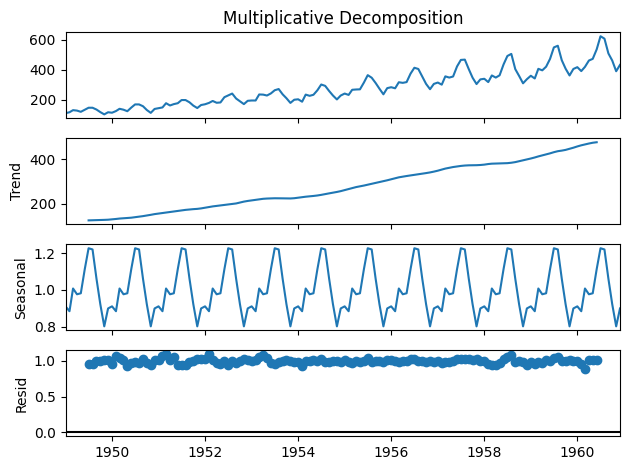

In [55]:
# Multiplicative
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data2 = pd.read_csv(f"{data_dir}AirPassengers.csv", index_col=0)
data2.index = pd.to_datetime(data2.index)

data2.rename(columns={'#Passengers': 'Multiplicative Decomposition'}, inplace=True)
decomposition_plot_multi = seasonal_decompose(data2['Multiplicative Decomposition'],
                                              model='multiplicative')
decomposition_plot_multi.plot()
plt.show()

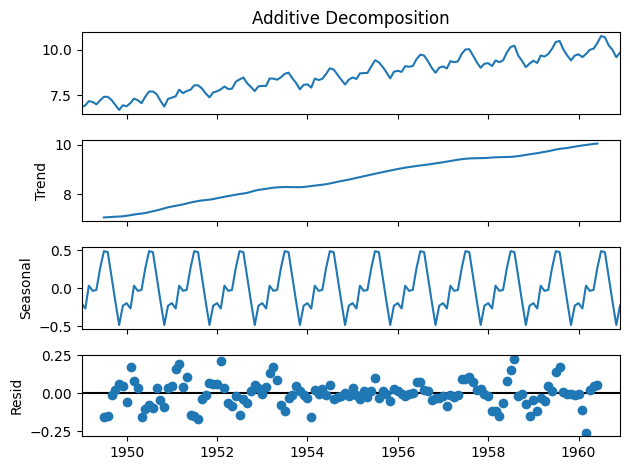

In [56]:
# Additive
# Apply boxcox to acquire additive model
data2['Additive Decomposition'], lam = boxcox(data2['Multiplicative Decomposition'])

# Plot the decomposition for additive series
decomposition_plot_add = seasonal_decompose(data2['Additive Decomposition'],
                                            model='additive')
decomposition_plot_add.plot()
plt.show()